In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from scipy import stats
from scikit_posthocs import posthoc_tukey
from matplotlib import rc
from statannotations.Annotator import Annotator
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Motility

In [2]:
# read in motility 1 data
df_mot_1 = pd.read_csv('Data/motility_1.csv')

# read in motility 2 data
df_mot_2 = pd.read_csv('Data/motility_2.csv')

# read in survival 1 data
df_sur_1 = pd.read_csv('Data/survival_1.csv')

# read in survival 2 data
df_sur_2 = pd.read_csv('Data/survival_2.csv')

In [3]:
# drop Number column from motility 2 and survival 1 data
df_mot_2 = df_mot_2.drop(columns=['Number'])
df_sur_1 = df_sur_1.drop(columns=['No.'])
df_sur_2 = df_sur_2.drop(columns=['No.'])

In [4]:
# drop rows where Average is 0
df_mot_1 = df_mot_1[df_mot_1['Average'] != 0]
df_mot_2 = df_mot_2[df_mot_2['Average'] != 0]


In [5]:
df_mot_2

,Treatments,Worm #1,Worm #2,Worm #3,Average
0,E coli control in NGM,53,92,65,70.000000
2,.1 mg/mL Pomegranate Juice in NGM,112,98,108,106.000000
4,.5 mg/mL Pomegranate Juice in NGM,24,70,72,55.333333
6,2.5 mg/mL Pomegranate Juice in NGM,34,52,42,42.666667
8,.1 mg/mL Green Tea in NGM,21,9,12,14.000000
10,.5 mg/mL Green Tea in NGM,31,12,0,21.500000
12,2.5 mg/mL Green Tea in NGM,0,0,6,6.000000


In [6]:
# keep only Treatments and Average columns in motility 1 and motility 2 data
# df_mot_1 = df_mot_1[['Treatments', 'Average']]
# df_mot_2 = df_mot_2[['Treatments', 'Average']]


In [7]:
# create new df treatments and average of motility 1 and motility 2 data
# df_mot = pd.concat([df_mot_1, df_mot_2], ignore_index=True)
# df_mot = df_mot.groupby('Treatments').mean().reset_index()

# create new df concat of motility 1 and motility 2 data
df_mot = pd.concat([df_mot_1, df_mot_2], ignore_index=True)

# show df_mot
df_mot

,Treatments,Worm #1,Worm #2,Worm #3,Average
0,E coli control in NGM,53,49,63,55.000000
1,.1 mg/mL Pomegranate Juice in NGM,186,86,193,155.000000
2,.5 mg/mL Pomegranate Juice in NGM,70,70,54,64.666667
3,2.5 mg/mL Pomegranate Juice in NGM,27,39,61,42.333333
4,.1 mg/mL Green Tea in NGM,33,92,33,52.666667
5,.5 mg/mL Green Tea in NGM,38,48,40,42.000000
6,2.5 mg/mL Green Tea in NGM,34,122,30,62.000000
7,E coli control in NGM,53,92,65,70.000000
8,.1 mg/mL Pomegranate Juice in NGM,112,98,108,106.000000
9,.5 mg/mL Pomegranate Juice in NGM,24,70,72,55.333333


In [8]:
# rename Worm #1 to Turns and Worm #2 to Turns and Worm #3 to Turns
df_mot = df_mot.rename(columns={'Worm #1': 'Turns', 'Worm #2': 'Turns', 'Worm #3': 'Turns'})

# show df_mot
df_mot

,Treatments,Turns,Turns,Turns,Average
0,E coli control in NGM,53,49,63,55.000000
1,.1 mg/mL Pomegranate Juice in NGM,186,86,193,155.000000
2,.5 mg/mL Pomegranate Juice in NGM,70,70,54,64.666667
3,2.5 mg/mL Pomegranate Juice in NGM,27,39,61,42.333333
4,.1 mg/mL Green Tea in NGM,33,92,33,52.666667
5,.5 mg/mL Green Tea in NGM,38,48,40,42.000000
6,2.5 mg/mL Green Tea in NGM,34,122,30,62.000000
7,E coli control in NGM,53,92,65,70.000000
8,.1 mg/mL Pomegranate Juice in NGM,112,98,108,106.000000
9,.5 mg/mL Pomegranate Juice in NGM,24,70,72,55.333333


In [9]:
# concat turns values into one column
df_mot = df_mot.melt(id_vars=['Treatments'], value_vars=['Turns'], var_name='Worm', value_name='Turns per Minute')

# create new df with only Treatments and Turns columns
df_mot = df_mot[['Treatments', 'Turns per Minute']]

# convert Turns per Minute column to int
df_mot['Turns per Minute'] = df_mot['Turns per Minute'].astype(int)

# remove rows where Turns per Minute is 0
df_mot = df_mot[df_mot['Turns per Minute'] != 0]

# show df_mot
df_mot

,Treatments,Turns per Minute
0,E coli control in NGM,53
1,.1 mg/mL Pomegranate Juice in NGM,186
2,.5 mg/mL Pomegranate Juice in NGM,70
3,2.5 mg/mL Pomegranate Juice in NGM,27
4,.1 mg/mL Green Tea in NGM,33
5,.5 mg/mL Green Tea in NGM,38
6,2.5 mg/mL Green Tea in NGM,34
7,E coli control in NGM,53
8,.1 mg/mL Pomegranate Juice in NGM,112
9,.5 mg/mL Pomegranate Juice in NGM,24


In [10]:
# add new column to df_mot with treatment type
df_mot['Treatment Type'] = df_mot['Treatments'].str.split(' ').str[2] + ' ' + df_mot['Treatments'].str.split(' ').str[3]

# Treatment Type for E coli set to 'E. Coli'
df_mot.loc[df_mot['Treatment Type'] == 'control in', 'Treatment Type'] = 'E. coli'

# remove 'in NGM' from Treatments column
df_mot['Treatments'] = df_mot['Treatments'].str.replace(' in NGM', '')

# add 0 to Treatments column that start with '.'
df_mot.loc[df_mot['Treatments'].str.startswith('.'), 'Treatments'] = '0' + df_mot['Treatments']

# rename E coli control to 'E. coli'
df_mot.loc[df_mot['Treatments'] == 'E coli control', 'Treatments'] = 'E. coli'

# show df_mot
df_mot


,Treatments,Turns per Minute,Treatment Type
0,E. coli,53,E. coli
1,0.1 mg/mL Pomegranate Juice,186,Pomegranate Juice
2,0.5 mg/mL Pomegranate Juice,70,Pomegranate Juice
3,2.5 mg/mL Pomegranate Juice,27,Pomegranate Juice
4,0.1 mg/mL Green Tea,33,Green Tea
5,0.5 mg/mL Green Tea,38,Green Tea
6,2.5 mg/mL Green Tea,34,Green Tea
7,E. coli,53,E. coli
8,0.1 mg/mL Pomegranate Juice,112,Pomegranate Juice
9,0.5 mg/mL Pomegranate Juice,24,Pomegranate Juice


In [11]:
# reorder Treatments column to be in order of increasing concentration and Treatment Type
df_mot = df_mot.sort_values(by=['Treatment Type', 'Treatments'])

# show df_mot
df_mot

,Treatments,Turns per Minute,Treatment Type
0,E. coli,53,E. coli
7,E. coli,53,E. coli
14,E. coli,49,E. coli
21,E. coli,92,E. coli
28,E. coli,63,E. coli
35,E. coli,65,E. coli
4,0.1 mg/mL Green Tea,33,Green Tea
11,0.1 mg/mL Green Tea,21,Green Tea
18,0.1 mg/mL Green Tea,92,Green Tea
25,0.1 mg/mL Green Tea,9,Green Tea


In [12]:
treatments = np.unique(df_mot.Treatments)

data = []

for treatment in treatments:
    data.append(df_mot[df_mot.Treatments == treatment]['Turns per Minute'])

# perform anova
stats.f_oneway(*data)

F_onewayResult(statistic=7.6718793740863145, pvalue=3.696305424633804e-05)

In [13]:
tukey_df = posthoc_tukey(df_mot, val_col="Turns per Minute", group_col="Treatments")
tukey_df

,E. coli,0.1 mg/mL Green Tea,0.5 mg/mL Green Tea,2.5 mg/mL Green Tea,0.1 mg/mL Pomegranate Juice,0.5 mg/mL Pomegranate Juice,2.5 mg/mL Pomegranate Juice
E. coli,1.000000,0.598120,0.656993,0.900000,0.005870,0.900000,0.897557
0.1 mg/mL Green Tea,0.598120,1.000000,0.900000,0.900000,0.001000,0.679784,0.900000
0.5 mg/mL Green Tea,0.656993,0.900000,1.000000,0.900000,0.001000,0.734856,0.900000
2.5 mg/mL Green Tea,0.900000,0.900000,0.900000,1.000000,0.002336,0.900000,0.900000
0.1 mg/mL Pomegranate Juice,0.005870,0.001000,0.001000,0.002336,1.000000,0.003956,0.001000
0.5 mg/mL Pomegranate Juice,0.900000,0.679784,0.734856,0.900000,0.003956,1.000000,0.900000
2.5 mg/mL Pomegranate Juice,0.897557,0.900000,0.900000,0.900000,0.001000,0.900000,1.000000


In [14]:
remove = np.tril(np.ones(tukey_df.shape), k=0).astype("bool")
tukey_df[remove] = np.nan

molten_df = tukey_df.melt(ignore_index=False).reset_index().dropna()
molten_df

# remove rows where value is greater than 0.05
molten_df = molten_df[molten_df['value'] <= 0.05]

In [15]:
molten_df

,index,variable,value
28,E. coli,0.1 mg/mL Pomegranate Juice,0.005870
29,0.1 mg/mL Green Tea,0.1 mg/mL Pomegranate Juice,0.001000
30,0.5 mg/mL Green Tea,0.1 mg/mL Pomegranate Juice,0.001000
31,2.5 mg/mL Green Tea,0.1 mg/mL Pomegranate Juice,0.002336
39,0.1 mg/mL Pomegranate Juice,0.5 mg/mL Pomegranate Juice,0.003956
46,0.1 mg/mL Pomegranate Juice,2.5 mg/mL Pomegranate Juice,0.001000


In [16]:
# list of treatments
treatments = list(df_mot.Treatments)

# remove duplicate treatments
treatments = np.array(list(dict.fromkeys(treatments)), dtype=object)

treatments

array(['E. coli', '0.1 mg/mL Green Tea', '0.5 mg/mL Green Tea',
       '2.5 mg/mL Green Tea', '0.1 mg/mL Pomegranate Juice',
       '0.5 mg/mL Pomegranate Juice ', '2.5 mg/mL Pomegranate Juice'],
      dtype=object)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.5 mg/mL Green Tea vs. 0.1 mg/mL Pomegranate Juice: Custom statistical test, P_val:2.336e-03
0.1 mg/mL Pomegranate Juice vs. 0.5 mg/mL Pomegranate Juice : Custom statistical test, P_val:3.956e-03
0.5 mg/mL Green Tea vs. 0.1 mg/mL Pomegranate Juice: Custom statistical test, P_val:1.000e-03
0.1 mg/mL Pomegranate Juice vs. 2.5 mg/mL Pomegranate Juice: Custom statistical test, P_val:1.000e-03
0.1 mg/mL Green Tea vs. 0.1 mg/mL Pomegranate Juice: Custom statistical test, P_val:1.000e-03
E. coli vs. 0.1 mg/mL Pomegranate Juice: Custom statistical test, P_val:5.870e-03


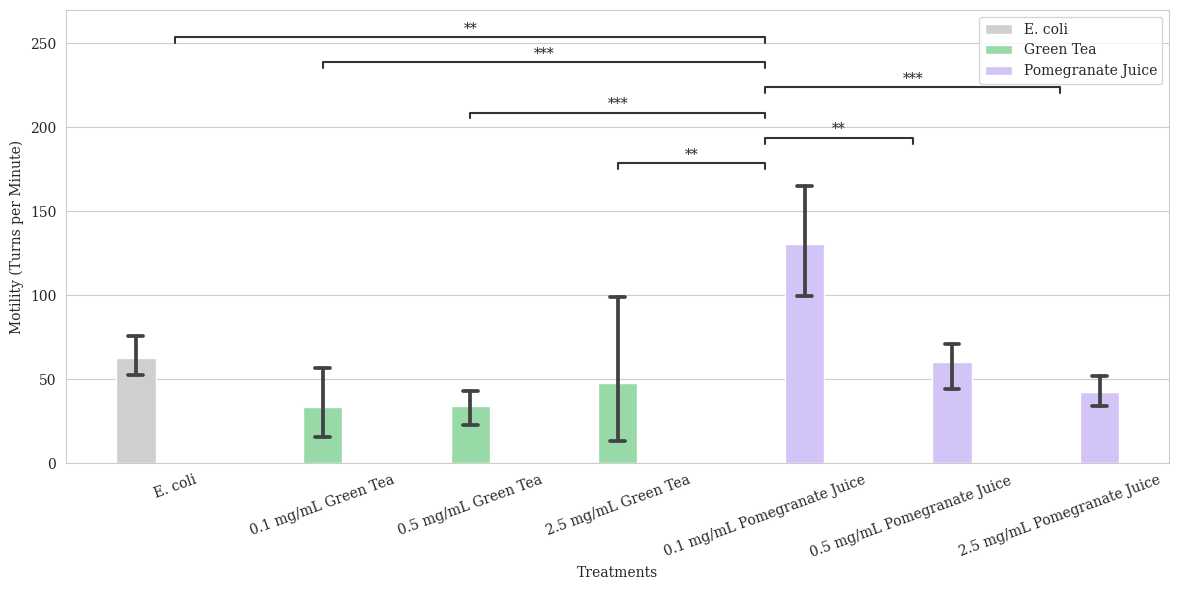

In [17]:
# grouped bar chart of motility data with sns
colors =  [sns.color_palette("pastel")[7], sns.color_palette("pastel")[2], sns.color_palette("pastel")[4]]
sns.set_style("whitegrid", {'font.family': 'serif', 'font.serif': 'Times New Roman'})
sns.axes_style()
ax = sns.barplot(x="Treatments", y="Turns per Minute", hue="Treatment Type", data=df_mot, palette=colors, estimator=np.mean, ci=95, capsize=.1)
ax.set(xlabel='Treatments', ylabel='Motility (Turns per Minute)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='center')
ax.legend(loc='upper right')

# increase size of plot
fig = plt.gcf()
fig.set_size_inches(12, 6)

pairs = [(i[1]["index"], i[1]["variable"]) for i in molten_df.iterrows()]
p_values = [i[1]["value"] for i in molten_df.iterrows()]

annotator = Annotator(
    ax, pairs, data=df_mot, x="Treatments", y="Turns per Minute", order=treatments
)

annotator.configure(text_format="star", loc="inside")
annotator.set_pvalues_and_annotate(p_values)

plt.tight_layout()

plt.show()

# Survival

In [18]:
df_sur = pd.concat([df_sur_1, df_sur_2], ignore_index=True)

In [19]:
# surivival data
df_sur

,Treatments,30 min,Percentage 30,60 min,Percentage 60,90 min,Percentage 90
0,E. coli control in NGM,8,80,8,80,2,20
1,E. coli control in NGM + H2O2,1,10,0,0,0,0
2,0.1 mg/mL Pomegranate Juice in NGM,9,90,9,90,8,80
3,0.1 mg/mL Pomegranate Juice in NGM + H2O2,10,100,0,0,0,0
4,0.5 mg/mL Pomegranate Juice in NGM,10,100,10,100,10,100
5,0.5 mg/mL Pomegranate Juice in NGM + H2O2,9,90,3,30,1,10
6,2.5 mg/mL Pomegranate Juice in NGM,5,50,3,30,3,30
7,2.5 mg/mL Pomegranate Juice in NGM + H2O2,5,50,1,10,0,0
8,0.1 mg/mL Green Tea in NGM,10,100,10,100,10,100
9,0.1 mg/mL Green Tea in NGM + H2O2,9,90,0,0,0,0


In [20]:
# drop 30 min, 60 min, and 90 min columns
df_sur = df_sur.drop(['30 min', '60 min', '90 min'], axis=1)

# show df_sur
df_sur

,Treatments,Percentage 30,Percentage 60,Percentage 90
0,E. coli control in NGM,80,80,20
1,E. coli control in NGM + H2O2,10,0,0
2,0.1 mg/mL Pomegranate Juice in NGM,90,90,80
3,0.1 mg/mL Pomegranate Juice in NGM + H2O2,100,0,0
4,0.5 mg/mL Pomegranate Juice in NGM,100,100,100
5,0.5 mg/mL Pomegranate Juice in NGM + H2O2,90,30,10
6,2.5 mg/mL Pomegranate Juice in NGM,50,30,30
7,2.5 mg/mL Pomegranate Juice in NGM + H2O2,50,10,0
8,0.1 mg/mL Green Tea in NGM,100,100,100
9,0.1 mg/mL Green Tea in NGM + H2O2,90,0,0


In [21]:
# add new column to df_sur with treatment type
df_sur['Treatment Type'] = df_sur['Treatments'].str.split(' ').str[2] + ' ' + df_sur['Treatments'].str.split(' ').str[3]

# Treatment Type for E coli set to 'E. Coli'
df_sur.loc[df_sur['Treatment Type'] == 'control in', 'Treatment Type'] = 'E. Coli'

# remove 'in NGM' from Treatments column
df_sur['Treatments'] = df_sur['Treatments'].str.replace(' in NGM', '')

# show df_sur
df_sur

,Treatments,Percentage 30,Percentage 60,Percentage 90,Treatment Type
0,E. coli control,80,80,20,E. Coli
1,E. coli control + H2O2,10,0,0,E. Coli
2,0.1 mg/mL Pomegranate Juice,90,90,80,Pomegranate Juice
3,0.1 mg/mL Pomegranate Juice + H2O2,100,0,0,Pomegranate Juice
4,0.5 mg/mL Pomegranate Juice,100,100,100,Pomegranate Juice
5,0.5 mg/mL Pomegranate Juice + H2O2,90,30,10,Pomegranate Juice
6,2.5 mg/mL Pomegranate Juice,50,30,30,Pomegranate Juice
7,2.5 mg/mL Pomegranate Juice + H2O2,50,10,0,Pomegranate Juice
8,0.1 mg/mL Green Tea,100,100,100,Green Tea
9,0.1 mg/mL Green Tea + H2O2,90,0,0,Green Tea


In [22]:
# change Treatments with 'E coli control' to 'E. Coli'
df_sur.loc[df_sur['Treatments'] == 'E. coli control', 'Treatments'] = 'E. Coli'

df_sur.loc[df_sur['Treatments'] == 'E. coli control + H2O2', 'Treatments'] = 'E. Coli + H2O2'

# show df_sur
df_sur

,Treatments,Percentage 30,Percentage 60,Percentage 90,Treatment Type
0,E. Coli,80,80,20,E. Coli
1,E. Coli + H2O2,10,0,0,E. Coli
2,0.1 mg/mL Pomegranate Juice,90,90,80,Pomegranate Juice
3,0.1 mg/mL Pomegranate Juice + H2O2,100,0,0,Pomegranate Juice
4,0.5 mg/mL Pomegranate Juice,100,100,100,Pomegranate Juice
5,0.5 mg/mL Pomegranate Juice + H2O2,90,30,10,Pomegranate Juice
6,2.5 mg/mL Pomegranate Juice,50,30,30,Pomegranate Juice
7,2.5 mg/mL Pomegranate Juice + H2O2,50,10,0,Pomegranate Juice
8,0.1 mg/mL Green Tea,100,100,100,Green Tea
9,0.1 mg/mL Green Tea + H2O2,90,0,0,Green Tea


In [23]:
# add Percentage 0 column to df_sur with value of 100 for all rows
df_sur['Percentage 0'] = 100

# show df_sur
df_sur

,Treatments,Percentage 30,Percentage 60,Percentage 90,Treatment Type,Percentage 0
0,E. Coli,80,80,20,E. Coli,100
1,E. Coli + H2O2,10,0,0,E. Coli,100
2,0.1 mg/mL Pomegranate Juice,90,90,80,Pomegranate Juice,100
3,0.1 mg/mL Pomegranate Juice + H2O2,100,0,0,Pomegranate Juice,100
4,0.5 mg/mL Pomegranate Juice,100,100,100,Pomegranate Juice,100
5,0.5 mg/mL Pomegranate Juice + H2O2,90,30,10,Pomegranate Juice,100
6,2.5 mg/mL Pomegranate Juice,50,30,30,Pomegranate Juice,100
7,2.5 mg/mL Pomegranate Juice + H2O2,50,10,0,Pomegranate Juice,100
8,0.1 mg/mL Green Tea,100,100,100,Green Tea,100
9,0.1 mg/mL Green Tea + H2O2,90,0,0,Green Tea,100


In [24]:
# new df but drop green tea
df_sur_pom = df_sur[df_sur['Treatment Type'] != 'Green Tea']  

# new df but drop pomegranate juice
df_sur_tea = df_sur[df_sur['Treatment Type'] != 'Pomegranate Juice']


In [25]:
# show df_sur_pom
df_sur_pom


,Treatments,Percentage 30,Percentage 60,Percentage 90,Treatment Type,Percentage 0
0,E. Coli,80,80,20,E. Coli,100
1,E. Coli + H2O2,10,0,0,E. Coli,100
2,0.1 mg/mL Pomegranate Juice,90,90,80,Pomegranate Juice,100
3,0.1 mg/mL Pomegranate Juice + H2O2,100,0,0,Pomegranate Juice,100
4,0.5 mg/mL Pomegranate Juice,100,100,100,Pomegranate Juice,100
5,0.5 mg/mL Pomegranate Juice + H2O2,90,30,10,Pomegranate Juice,100
6,2.5 mg/mL Pomegranate Juice,50,30,30,Pomegranate Juice,100
7,2.5 mg/mL Pomegranate Juice + H2O2,50,10,0,Pomegranate Juice,100
14,E. Coli,70,50,50,E. Coli,100
15,E. Coli + H2O2,0,0,0,E. Coli,100


In [26]:
# convert df_sur_pom to long format
df_sur_pom = df_sur_pom.melt(id_vars=['Treatments', 'Treatment Type'], var_name='Time', value_name='Survival')

# remove 'Percentage' from Time column
df_sur_pom['Time'] = df_sur_pom['Time'].str.replace('Percentage ', '')

# convert Time column to int
df_sur_pom['Time'] = df_sur_pom['Time'].astype(int)

# convert Survival column to int
df_sur_pom['Survival'] = df_sur_pom['Survival'].astype(int)

# show df_sur_pom
df_sur_pom

,Treatments,Treatment Type,Time,Survival
0,E. Coli,E. Coli,30,80
1,E. Coli + H2O2,E. Coli,30,10
2,0.1 mg/mL Pomegranate Juice,Pomegranate Juice,30,90
3,0.1 mg/mL Pomegranate Juice + H2O2,Pomegranate Juice,30,100
4,0.5 mg/mL Pomegranate Juice,Pomegranate Juice,30,100
...,...,...,...,...
59,0.1 mg/mL Pomegranate Juice + H2O2,Pomegranate Juice,0,100
60,0.5 mg/mL Pomegranate Juice,Pomegranate Juice,0,100
61,0.5 mg/mL Pomegranate Juice + H2O2,Pomegranate Juice,0,100
62,2.5 mg/mL Pomegranate Juice,Pomegranate Juice,0,100


In [27]:
# if Treatments value contains 'H2O2' add to row to df_sur_pom_H2O2
df_sur_pom_H2O2 = df_sur_pom[df_sur_pom['Treatments'].str.contains('H2O2')]
df_sur_pom_H2O2

,Treatments,Treatment Type,Time,Survival
1,E. Coli + H2O2,E. Coli,30,10
3,0.1 mg/mL Pomegranate Juice + H2O2,Pomegranate Juice,30,100
5,0.5 mg/mL Pomegranate Juice + H2O2,Pomegranate Juice,30,90
7,2.5 mg/mL Pomegranate Juice + H2O2,Pomegranate Juice,30,50
9,E. Coli + H2O2,E. Coli,30,0
11,0.1 mg/mL Pomegranate Juice + H2O2,Pomegranate Juice,30,70
13,0.5 mg/mL Pomegranate Juice + H2O2,Pomegranate Juice,30,0
15,2.5 mg/mL Pomegranate Juice + H2O2,Pomegranate Juice,30,0
17,E. Coli + H2O2,E. Coli,60,0
19,0.1 mg/mL Pomegranate Juice + H2O2,Pomegranate Juice,60,0


In [28]:
# convert df_sur_tea to long format
df_sur_tea = df_sur_tea.melt(id_vars=['Treatments', 'Treatment Type'], var_name='Time', value_name='Survival')

# remove 'Percentage' from Time column
df_sur_tea['Time'] = df_sur_tea['Time'].str.replace('Percentage ', '')

# convert Time column to int
df_sur_tea['Time'] = df_sur_tea['Time'].astype(int)

# convert Survival column to int
df_sur_tea['Survival'] = df_sur_tea['Survival'].astype(int)

# show df_sur_tea
df_sur_tea

,Treatments,Treatment Type,Time,Survival
0,E. Coli,E. Coli,30,80
1,E. Coli + H2O2,E. Coli,30,10
2,0.1 mg/mL Green Tea,Green Tea,30,100
3,0.1 mg/mL Green Tea + H2O2,Green Tea,30,90
4,0.5 mg/mL Green Tea,Green Tea,30,100
...,...,...,...,...
59,0.1 mg/mL Green Tea + H2O2,Green Tea,0,100
60,0.5 mg/mL Green Tea,Green Tea,0,100
61,0.5 mg/mL Green Tea + H2O2,Green Tea,0,100
62,2.5 mg/mL Green Tea,Green Tea,0,100


In [29]:
# if Treatments value contains 'H2O2' add to row to df_sur_tea_H2O2
df_sur_tea_H2O2 = df_sur_tea[df_sur_tea['Treatments'].str.contains('H2O2')]
df_sur_tea_H2O2

,Treatments,Treatment Type,Time,Survival
1,E. Coli + H2O2,E. Coli,30,10
3,0.1 mg/mL Green Tea + H2O2,Green Tea,30,90
5,0.5 mg/mL Green Tea + H2O2,Green Tea,30,10
7,2.5 mg/mL Green Tea + H2O2,Green Tea,30,0
9,E. Coli + H2O2,E. Coli,30,0
11,0.1 mg/mL Green Tea + H2O2,Green Tea,30,70
13,0.5 mg/mL Green Tea + H2O2,Green Tea,30,70
15,2.5 mg/mL Green Tea + H2O2,Green Tea,30,90
17,E. Coli + H2O2,E. Coli,60,0
19,0.1 mg/mL Green Tea + H2O2,Green Tea,60,0


In [30]:
paired = sns.color_palette("Paired")

In [31]:
# color palette is paired from 0:5 and 8:9
colors = [paired[1], paired[3], paired[5], paired[7]]

In [32]:
# remove row from df_sur_pom where Treatments contains 'H2O2'
df_sur_pom = df_sur_pom[~df_sur_pom['Treatments'].str.contains('H2O2')]

# remove row from df_sur_tea where Treatments contains 'H2O2'
df_sur_tea = df_sur_tea[~df_sur_tea['Treatments'].str.contains('H2O2')]


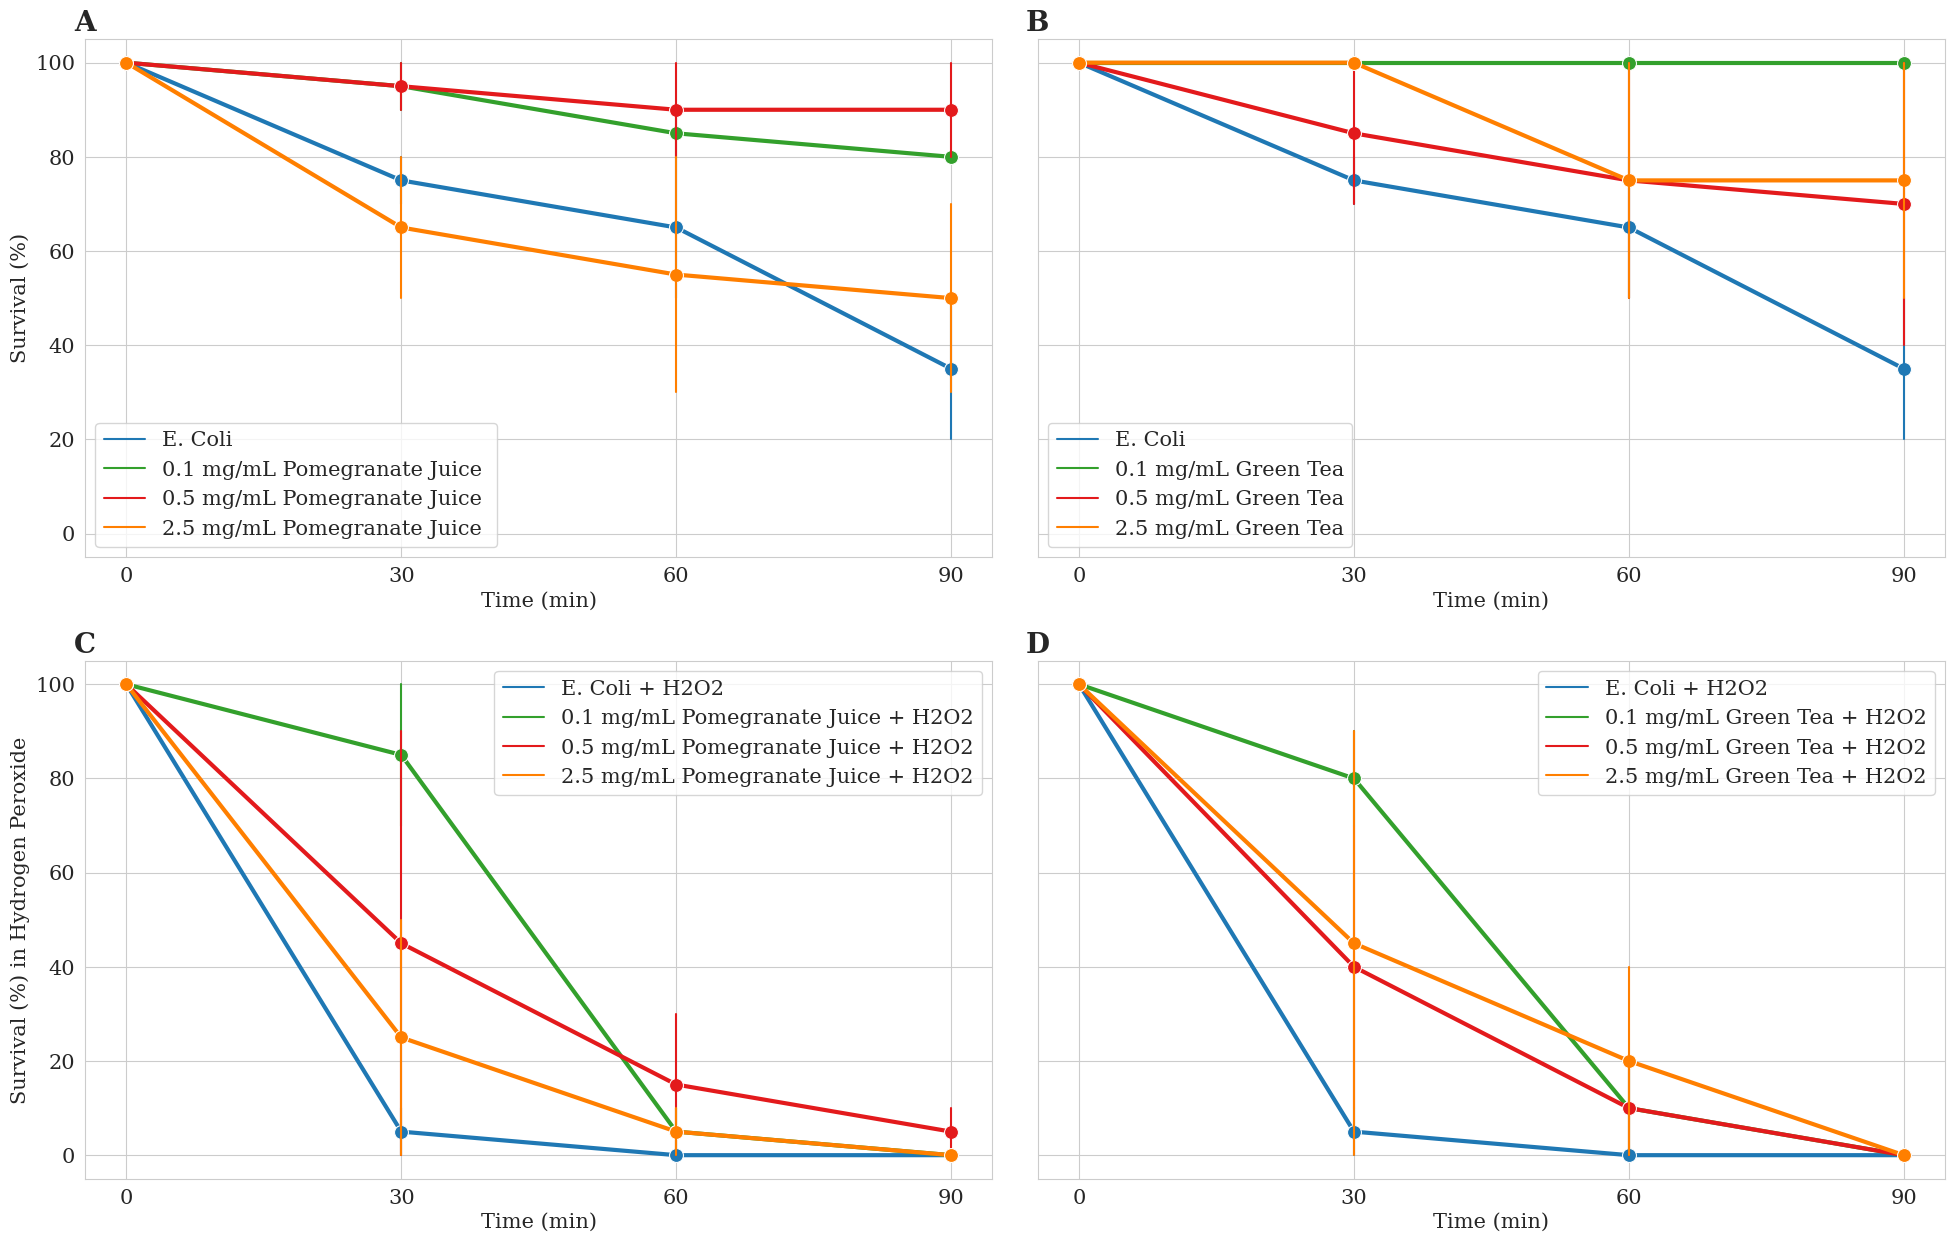

In [33]:
# make subplots in seaborn from ax and ax2
fig, axes = plt.subplots(2, 2, sharey=True)

# style
sns.set_style("whitegrid", {'font.family': 'serif', 'font.serif': 'Times New Roman'})
sns.axes_style()

# multi line plot of pomegranate juice survival data with sns
ax = sns.lineplot(ax=axes[0, 0], x="Time", y="Survival", hue="Treatments", data=df_sur_pom, palette=colors, ci=95, err_style='bars', 
                  marker="o", markersize=10, linewidth=3)
ax.set(xlabel='Time (min)', ylabel='Survival (%)')
ax.set_xticks([0, 30, 60, 90])
# set x axis label and ticks to 15
ax.tick_params(axis='x', labelsize=15)
# set y axis label and ticks to 15
ax.tick_params(axis='y', labelsize=15)
# set y label to 15
ax.yaxis.label.set_size(15)
# set x label to 15
ax.xaxis.label.set_size(15)
ax.legend(loc='lower left', fontsize=15)
ax.set_title('A', fontsize=20)
ax.title.set_weight('bold')
ax.title.set_position([0, 1.05])

# multi line plot of green tea survival data with sns
ax2 = sns.lineplot(ax=axes[0, 1], x="Time", y="Survival", hue="Treatments", data=df_sur_tea, palette=colors, ci=95, err_style='bars', 
                   marker="o", markersize=10, linewidth=3)
ax2.set(xlabel='Time (min)', ylabel='Survival (%)')
ax2.set_xticks([0, 30, 60, 90])
# set x axis label and ticks to 15
ax2.tick_params(axis='x', labelsize=15)
# set y axis label and ticks to 15
ax2.tick_params(axis='y', labelsize=15)
# set y label to 15
ax2.yaxis.label.set_size(15)
# set x label to 15
ax2.xaxis.label.set_size(15)
ax2.legend(loc='lower left', fontsize=15)
ax2.set_title('B', fontsize=20)
# make title bold
ax2.title.set_weight('bold')
ax2.title.set_position([0, 1.05])

# multi line plot of pomegranate juice H2O2 survival data with sns
ax3 = sns.lineplot(ax=axes[1, 0], x="Time", y="Survival", hue="Treatments", data=df_sur_pom_H2O2, palette=colors, ci=95, err_style='bars', 
                   marker="o", markersize=10, linewidth=3)
ax3.set(xlabel='Time (min)', ylabel='Survival (%) in Hydrogen Peroxide')
ax3.set_xticks([0, 30, 60, 90])
# set x axis label and ticks to 15
ax3.tick_params(axis='x', labelsize=15)
# set y axis label and ticks to 15
ax3.tick_params(axis='y', labelsize=15)
# set y label to 15
ax3.yaxis.label.set_size(15)
# set x label to 15
ax3.xaxis.label.set_size(15)
ax3.legend(loc='upper right', fontsize=15)
ax3.set_title('C', fontsize=20)
ax3.title.set_weight('bold')
ax3.title.set_position([0, 1.05])

# multi line plot of green tea survival data with sns
ax4 = sns.lineplot(ax=axes[1, 1], x="Time", y="Survival", hue="Treatments", data=df_sur_tea_H2O2, palette=colors, ci=95, err_style='bars', 
                   marker="o", markersize=10, linewidth=3)
ax4.set(xlabel='Time (min)', ylabel='Survival (%) in Hydrogen Peroxide')
ax4.set_xticks([0, 30, 60, 90])
# set x axis label and ticks to 15
ax4.tick_params(axis='x', labelsize=15)
# set y axis label and ticks to 15
ax4.tick_params(axis='y', labelsize=15)
# set y label to 15
ax4.yaxis.label.set_size(15)
# set x label to 15
ax4.xaxis.label.set_size(15)
ax4.legend(loc='upper right', fontsize=15)
ax4.set_title('D', fontsize=20)
# make title bold
ax4.title.set_weight('bold')
ax4.title.set_position([0, 1.05])

# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.2)

# Adjust size
fig = plt.gcf()
fig.set_size_inches(24, 14.8)


In [34]:
# 516.0pt

inches_per_pt = 1 / 72.27

golden_ratio = (5**.5 - 1) / 2

fig_width_in = 516 * inches_per_pt

fig_height_in = fig_width_in * golden_ratio * (1 / 2)

fig_dim = (fig_width_in, fig_height_in)

fig_dim

# multiple each value in fig_dim by 3.3613953488372093
fig_dim = (fig_dim[0] * 3.3613953488372093, fig_dim[1] * 3.3613953488372093)

fig_dim

(24.0, 7.41640786499874)

In [35]:
24 / 7.139892071398921

3.3613953488372093

# Two Way ANOVA

In [36]:
df_sur

,Treatments,Percentage 30,Percentage 60,Percentage 90,Treatment Type,Percentage 0
0,E. Coli,80,80,20,E. Coli,100
1,E. Coli + H2O2,10,0,0,E. Coli,100
2,0.1 mg/mL Pomegranate Juice,90,90,80,Pomegranate Juice,100
3,0.1 mg/mL Pomegranate Juice + H2O2,100,0,0,Pomegranate Juice,100
4,0.5 mg/mL Pomegranate Juice,100,100,100,Pomegranate Juice,100
5,0.5 mg/mL Pomegranate Juice + H2O2,90,30,10,Pomegranate Juice,100
6,2.5 mg/mL Pomegranate Juice,50,30,30,Pomegranate Juice,100
7,2.5 mg/mL Pomegranate Juice + H2O2,50,10,0,Pomegranate Juice,100
8,0.1 mg/mL Green Tea,100,100,100,Green Tea,100
9,0.1 mg/mL Green Tea + H2O2,90,0,0,Green Tea,100


In [37]:
df_sur = df_sur.melt(id_vars=['Treatments', 'Treatment Type'], var_name='Time', value_name='Survival')

# remove 'Percentage' from Time column
df_sur['Time'] = df_sur['Time'].str.replace('Percentage ', '')

# convert Time column to int
df_sur['Time'] = df_sur['Time'].astype(int)

# convert Survival column to int
df_sur['Survival'] = df_sur['Survival'].astype(int)

In [38]:
df_sur

,Treatments,Treatment Type,Time,Survival
0,E. Coli,E. Coli,30,80
1,E. Coli + H2O2,E. Coli,30,10
2,0.1 mg/mL Pomegranate Juice,Pomegranate Juice,30,90
3,0.1 mg/mL Pomegranate Juice + H2O2,Pomegranate Juice,30,100
4,0.5 mg/mL Pomegranate Juice,Pomegranate Juice,30,100
...,...,...,...,...
107,0.1 mg/mL Green Tea + H2O2,Green Tea,0,100
108,0.5 mg/mL Green Tea,Green Tea,0,100
109,0.5 mg/mL Green Tea + H2O2,Green Tea,0,100
110,2.5 mg/mL Green Tea,Green Tea,0,100


In [39]:
# create new column for h2O2 if treatments contains H2O2
df_sur['Ox'] = np.where(df_sur['Treatments'].str.contains('H2O2'), 'H2O2', 'Neutral')

# remove last 6 characters from Treatments column if H2O2 is in column
df_sur['Treatments'] = np.where(df_sur['Treatments'].str.contains('H2O2'), df_sur['Treatments'].str[:-6], df_sur['Treatments'])

df_sur

,Treatments,Treatment Type,Time,Survival,Ox
0,E. Coli,E. Coli,30,80,Neutral
1,E. Coli,E. Coli,30,10,H2O2
2,0.1 mg/mL Pomegranate Juice,Pomegranate Juice,30,90,Neutral
3,0.1 mg/mL Pomegranate Juice,Pomegranate Juice,30,100,H2O2
4,0.5 mg/mL Pomegranate Juice,Pomegranate Juice,30,100,Neutral
...,...,...,...,...,...
107,0.1 mg/mL Green Tea,Green Tea,0,100,H2O2
108,0.5 mg/mL Green Tea,Green Tea,0,100,Neutral
109,0.5 mg/mL Green Tea,Green Tea,0,100,H2O2
110,2.5 mg/mL Green Tea,Green Tea,0,100,Neutral


In [40]:
# df_sur with only time as 30
df_sur_30 = df_sur[df_sur['Time'] == 30]

# df_sur with only time as 60
df_sur_60 = df_sur[df_sur['Time'] == 60]

# df_sur with only time as 90
df_sur_90 = df_sur[df_sur['Time'] == 90]

df_sur_30

,Treatments,Treatment Type,Time,Survival,Ox
0,E. Coli,E. Coli,30,80,Neutral
1,E. Coli,E. Coli,30,10,H2O2
2,0.1 mg/mL Pomegranate Juice,Pomegranate Juice,30,90,Neutral
3,0.1 mg/mL Pomegranate Juice,Pomegranate Juice,30,100,H2O2
4,0.5 mg/mL Pomegranate Juice,Pomegranate Juice,30,100,Neutral
5,0.5 mg/mL Pomegranate Juice,Pomegranate Juice,30,90,H2O2
6,2.5 mg/mL Pomegranate Juice,Pomegranate Juice,30,50,Neutral
7,2.5 mg/mL Pomegranate Juice,Pomegranate Juice,30,50,H2O2
8,0.1 mg/mL Green Tea,Green Tea,30,100,Neutral
9,0.1 mg/mL Green Tea,Green Tea,30,90,H2O2


In [41]:
model = ols('Survival ~ C(Treatments) + C(Ox) + C(Treatments):C(Ox)', data=df_sur_90).fit()
sm.stats.anova_lm(model, typ=2)


/Users/sree/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 6
  warnings.warn('covariance of constraints does not have full '
/Users/sree/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/sree/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1900: RuntimeWarning: invalid value encountered in true_divide
  F /= J
/Users/sree/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 6
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Treatments),27901.148748,12.0,7.154141,0.001208
C(Ox),NaN,1.0,NaN,NaN
C(Treatments):C(Ox),11767.422680,12.0,3.017288,0.041543
Residual,4550.000000,14.0,NaN,NaN


## One-Way ANOVA

In [60]:
# df_sur_pom with only time as 90
# df_mot = df_sur_tea_H2O2[df_sur_tea_H2O2['Time'] == 90]

# df_sur_pom with only time as 60
# df_mot = df_sur_tea_H2O2[df_sur_tea_H2O2['Time'] == 60]

# df_sur_pom with only time as 30
df_mot = df_sur_tea_H2O2[df_sur_tea_H2O2['Time'] == 30]

In [61]:
treatments = np.unique(df_mot.Treatments)

data = []

for treatment in treatments:
    data.append(df_mot[df_mot.Treatments == treatment]['Survival'])

# perform anova
stats.f_oneway(*data)

tukey_df = posthoc_tukey(df_mot, val_col="Survival", group_col="Treatments")
tukey_df

remove = np.tril(np.ones(tukey_df.shape), k=0).astype("bool")
tukey_df[remove] = np.nan

molten_df = tukey_df.melt(ignore_index=False).reset_index().dropna()
molten_df

# remove rows where value is greater than 0.05
molten_df = molten_df[molten_df['value'] <= 0.05]

molten_df

,index,variable,value
